In [1]:
# https://wikidocs.net/154530
import numpy as np
import pandas as pd
import urllib.request
from sentence_transformers import SentenceTransformer

2022-06-03 18:35:09.107198: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
sbert_kor = SentenceTransformer('sentence-transformers/xlm-r-large-en-ko-nli-ststb')

In [13]:
sentences = ['높다', '낮다', '감소', '증가']
embeddings_kor = sbert_kor.encode(sentences)

In [14]:
from numpy import dot
from numpy.linalg import norm

In [15]:
def get_similarity(ans, right_ans, use="cosine"):
    # Cosine Similarity
    if use == "cosine":
        return dot(ans, right_ans)/(norm(ans)*norm(right_ans))
        
    # Euclidean
    if use == "euclidean":
        if norm(ans-right_ans)==norm(ans-right_ans):
            return norm(ans-right_ans)
        else:
            return -1
    
    
    # Pearson
    if use == "pearson":
        return dot((ans - np.mean(ans)), (right_ans - np.mean(right_ans))) / ((norm(ans - np.mean(ans))) * (norm(right_ans - np.mean(right_ans))))
        

In [16]:
pairs = []
for i, emb in enumerate(embeddings_kor):
    for j in range(i+1, len(embeddings_kor)):
        pairs.append((sentences[i], sentences[j],emb, embeddings_kor[j]))
#pairs[0]

In [17]:
for (sent1,sent2, ans, r_ans) in pairs:
    print(sent1," // ", sent2, get_similarity(ans, r_ans))

높다  //  낮다 0.17289333
높다  //  감소 0.089852326
높다  //  증가 0.8431429
낮다  //  감소 0.75305104
낮다  //  증가 0.105136
감소  //  증가 0.08927932


In [18]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

In [20]:
# 2차원으로 차원 축소
n_components = 2

# t-sne 모델 생성
model = TSNE(n_components=n_components)

tsne_np = model.fit_transform(embeddings_kor)

In [21]:
# 학습한 결과 2차원 공간 값 출력
print(tsne_np)

[[-176.73305   -86.87126 ]
 [-249.0828    -85.216545]
 [-250.73784  -157.56627 ]
 [-178.38751  -159.22095 ]]


In [22]:
# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

No handles with labels found to put in legend.


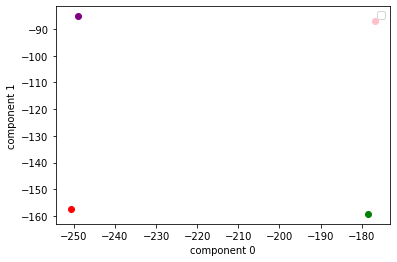

In [27]:
import matplotlib.pyplot as plt

# class target 정보 불러오기 
tsne_df['target'] = sentences

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == '높다']
tsne_df_1 = tsne_df[tsne_df['target'] == '낮다']
tsne_df_2 = tsne_df[tsne_df['target'] == '감소']
tsne_df_3 = tsne_df[tsne_df['target'] == '증가']

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'red')
plt.scatter(tsne_df_3['component 0'], tsne_df_3['component 1'], color = 'green')


plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()